In [1]:
#wget https://github.com/alexeygrigorev/dino-or-dragon/releases/download/data/dino-dragon.zip

In [2]:
# unzip the downloaded dataset
import zipfile
with zipfile.ZipFile('dino-dragon.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2022-11-21 01:17:58.473520: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


### Model

For this homework we will use Convolutional Neural Network (CNN). Like in the lectures, we'll use Keras.

You need to develop the model with following structure:

* The shape for input should be `(150, 150, 3)`
* Next, create a convolutional layer ([`Conv2D`](https://keras.io/api/layers/convolution_layers/convolution2d/)):
    * Use 32 filters
    * Kernel size should be `(3, 3)` (that's the size of the filter)
    * Use `'relu'` as activation 
* Reduce the size of the feature map with max pooling ([`MaxPooling2D`](https://keras.io/api/layers/pooling_layers/max_pooling2d/))
    * Set the pooling size to `(2, 2)`
* Turn the multi-dimensional result into vectors using a [`Flatten`](https://keras.io/api/layers/reshaping_layers/flatten/) layer
* Next, add a `Dense` layer with 64 neurons and `'relu'` activation
* Finally, create the `Dense` layer with 1 neuron - this will be the output
    * The output layer should have an activation - use the appropriate activation for the binary classification case

As optimizer use [`SGD`](https://keras.io/api/optimizers/sgd/) with the following parameters:

* `SGD(lr=0.002, momentum=0.8)`

In [4]:
def make_model():

    inputs = keras.Input(shape=(150, 150, 3))
    conv = keras.layers.Conv2D(32, 3, activation='relu')(inputs)
    pool = keras.layers.MaxPooling2D(pool_size=(2,2))(conv)
    vector = keras.layers.Flatten()(pool)
    dense = keras.layers.Dense(64, activation='relu')(vector)
    output = keras.layers.Dense(1, activation='sigmoid')(dense)
    model = keras.Model(inputs, output)


    optimizer = keras.optimizers.SGD(learning_rate=0.002, momentum=0.8)
    loss = keras.losses.BinaryCrossentropy(from_logits=False)


    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

### Question 1

Since we have a binary classification problem, what is the best loss function for us?

- `binary crossentropy`
- `focal loss`
- `mean squared error`
- `categorical crossentropy`

Note: since we specify an activation for the output layer, we don't need to set `from_logits=True`

#### Answer:  `BinaryCrossentropy`, Since it is binary classification problem and this function is specific for it.

### Question 2

What's the total number of parameters of the model? You can use the `summary` method for that. 

- 9215873
- 11215873
- 14215873
- 19215873


In [5]:
cnn_model = make_model()
cnn_model.summary()

2022-11-21 01:18:00.247032: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-21 01:18:00.254234: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-21 01:18:00.254850: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-21 01:18:00.255781: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                             

 NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-21 01:18:00.887684: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13795 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:1e.0, compute capability: 7.5


### Answer: Total number of parameters of the model is `11,215,873`

### Generators and Training

For the next two questions, use the following data generator for both train and test sets:

```python
ImageDataGenerator(rescale=1./255)
```

* We don't need to do any additional pre-processing for the images.
* When reading the data from train/val directories, check the `class_mode` parameter. Which value should it be for a binary classification problem?
* Use `batch_size=20`
* Use `shuffle=True` for both training and test sets. 

For training use `.fit()` with the following params:

```python
model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)
```

In [6]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
# single generator because why not
gen = ImageDataGenerator(rescale=1./255)
train_ds = gen.flow_from_directory(
    './train',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
    )
test_ds = gen.flow_from_directory(
    './test',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
    )

Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.


In [8]:
with tf.device("/device:GPU:0"):
    history = cnn_model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
    )

Epoch 1/10


2022-11-21 01:18:02.502852: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-11-21 01:18:03.143645: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-21 01:18:03.144183: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-21 01:18:03.144221: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-11-21 01:18:03.144707: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-21 01:18:03.144775: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


80/80 [==============================] - 11s 107ms/step - loss: 0.6331 - accuracy: 0.6393 - val_loss: 0.5225 - val_accuracy: 0.8096
Epoch 2/10
80/80 [==============================] - 8s 106ms/step - loss: 0.4739 - accuracy: 0.7980 - val_loss: 0.4115 - val_accuracy: 0.8503
Epoch 3/10
80/80 [==============================] - 8s 106ms/step - loss: 0.3952 - accuracy: 0.8344 - val_loss: 0.3754 - val_accuracy: 0.8528
Epoch 4/10
80/80 [==============================] - 9s 106ms/step - loss: 0.3321 - accuracy: 0.8664 - val_loss: 0.3294 - val_accuracy: 0.8680
Epoch 5/10
80/80 [==============================] - 8s 105ms/step - loss: 0.3004 - accuracy: 0.8915 - val_loss: 0.3075 - val_accuracy: 0.8655
Epoch 6/10
80/80 [==============================] - 8s 105ms/step - loss: 0.2709 - accuracy: 0.8984 - val_loss: 0.2924 - val_accuracy: 0.8858
Epoch 7/10
80/80 [==============================] - 8s 105ms/step - loss: 0.2353 - accuracy: 0.9166 - val_loss: 0.2821 - val_accuracy: 0.8858
Epoch 8/10
80/80

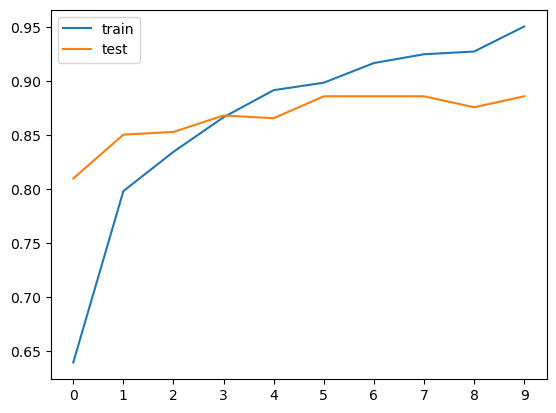

In [9]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xticks(np.arange(10))
plt.legend()

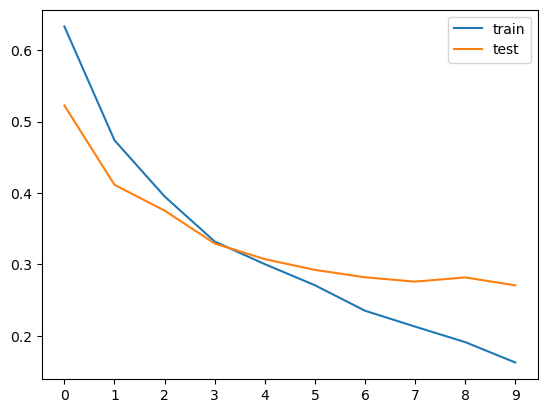

In [10]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xticks(np.arange(10))
plt.legend()

In [11]:
np.median(history.history['accuracy'])

0.8949184417724609

### Question 3

What is the median of training accuracy for all the epochs for this model?

- 0.40
- 0.60
- 0.90
- 0.20


### Answer: The median of training accuracy for all the epochs for this model `0.90`

### Question 4

What is the standard deviation of training loss for all the epochs for this model?

- 0.11
- 0.66
- 0.99
- 0.33

In [12]:
np.std(history.history['loss'])

0.13790271783320482

### Answer: The standard deviation of training loss for all the epochs for this model is `0.11`

### Data Augmentation

For the next two questions, we'll generate more data using data augmentations. 

Add the following augmentations to your training data generator:

* `rotation_range=40,`
* `width_shift_range=0.2,`
* `height_shift_range=0.2,`
* `shear_range=0.2,`
* `zoom_range=0.2,`
* `horizontal_flip=True,`
* `fill_mode='nearest'`

In [13]:
gen_transformed = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )
train_ds_01 = gen_transformed.flow_from_directory(
    './train',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
    )
test_ds = gen.flow_from_directory(
    './test',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
    )

Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.


In [14]:
with tf.device("/device:GPU:0"):
    history_01 = cnn_model.fit(
    train_ds_01,
    epochs=20,
    validation_data=test_ds,
    initial_epoch=10
    )

Epoch 11/20
80/80 [==============================] - 15s 188ms/step - loss: 0.4443 - accuracy: 0.7848 - val_loss: 0.5391 - val_accuracy: 0.7614
Epoch 12/20
80/80 [==============================] - 15s 186ms/step - loss: 0.3983 - accuracy: 0.8237 - val_loss: 0.3968 - val_accuracy: 0.8147
Epoch 13/20
80/80 [==============================] - 15s 186ms/step - loss: 0.3750 - accuracy: 0.8375 - val_loss: 0.4101 - val_accuracy: 0.8122
Epoch 14/20
80/80 [==============================] - 15s 185ms/step - loss: 0.3926 - accuracy: 0.8093 - val_loss: 0.3009 - val_accuracy: 0.8756
Epoch 15/20
80/80 [==============================] - 15s 186ms/step - loss: 0.3843 - accuracy: 0.8287 - val_loss: 0.3281 - val_accuracy: 0.8579
Epoch 16/20
80/80 [==============================] - 15s 188ms/step - loss: 0.3656 - accuracy: 0.8394 - val_loss: 0.2745 - val_accuracy: 0.8909
Epoch 17/20
80/80 [==============================] - 15s 186ms/step - loss: 0.3730 - accuracy: 0.8381 - val_loss: 0.3840 - val_accuracy:

Text(0.5, 1.0, 'Model - Training and test Accuracy')

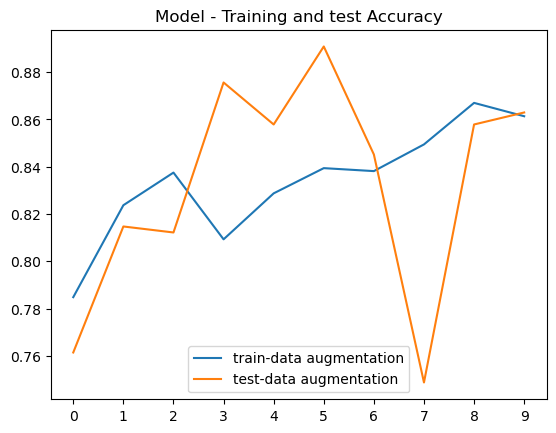

In [15]:
plt.plot(history_01.history['accuracy'], label='train-data augmentation')
plt.plot(history_01.history['val_accuracy'], label='test-data augmentation')
plt.xticks(np.arange(10))
plt.legend()
plt.title("Model - Training and test Accuracy",size = 12)

Text(0.5, 1.0, 'Model - Training and test Loss')

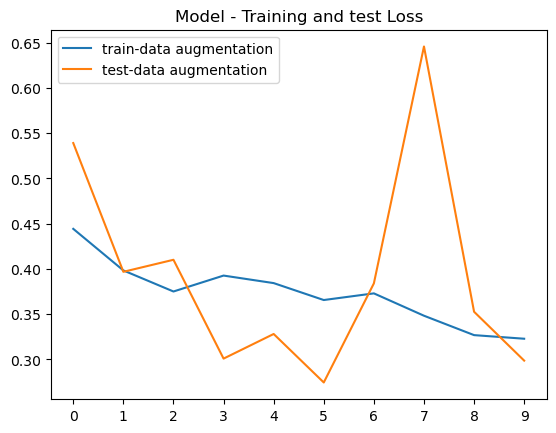

In [16]:
plt.plot(history_01.history['loss'], label='train-data augmentation')
plt.plot(history_01.history['val_loss'], label='test-data augmentation')
plt.xticks(np.arange(10))
plt.legend()
plt.title("Model - Training and test Loss",size = 12)

### Question 5 

Let's train our model for 10 more epochs using the same code as previously.
Make sure you don't re-create the model - we want to continue training the model
we already started training.

What is the mean of test loss for all the epochs for the model trained with augmentations?

- 0.15
- 0.77
- 0.37
- 0.97

In [17]:
np.mean(history_01.history['loss'])

0.3731013298034668

### Answer 05 : The mean of test loss for all the epochs for the model trained with augmentations`0.37`

### Question 6

What's the average of test accuracy for the last 5 epochs (from 6 to 10)
for the model trained with augmentations?

- 0.84
- 0.54
- 0.44
- 0.24


In [18]:
np.average(history_01.history['val_accuracy'][5:])   

0.841116750240326

### Answer: The average of test accuracy for the last 5 epochs (from 6 to 10) for the model trained with augmentations is `0.84`